In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [2]:
train = pd.read_csv('./train.csv')
train.drop(columns = ['Id'], inplace=True)
print(train.shape)
train.head()

(1095, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,Unf,0,Unf,0,732,732,GasA,Ex,Y,SBrkr,734,1104,0,1838,0,0,2,1,4,1,TA,7,Typ,1,Gd,BuiltIn,2005.0,Fin,2,372,TA,TA,Y,100,40,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,20,Unf,0,846,866,GasA,Ex,Y,SBrkr,866,902,0,1768,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,578,TA,TA,Y,144,105,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,108.0,Gd,TA,PConc,Gd,Gd,Mn,GLQ,24,Unf,0,1530,1554,GasA,Ex,Y,SBrkr,1554,0,0,1554,0,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,627,TA,TA,Y,156,73,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,8,1925,1994,Gambrel,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,Mn,Unf,0,Unf,0,702,702,GasA,Gd,Y,SBrkr,842,630,0,1472,0,0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,1925.0,Unf,1,250,TA,Fa,P,0,0,84,0,0,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,422,BLQ,127,480,1029,GasA,TA,Y,SBrkr,1117,0,0,1117,1,0,1,0,3,1,TA,6,Typ,1,TA,Detchd,1976.0,Unf,2,672,TA,TA,Y,144,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000


## 取出連續型特徵 (方便降維)

In [3]:
continual = train.columns[~(train.dtypes == 'object')]
df = train[continual]
print(df.shape)

(1095, 37)


## 分析缺失值

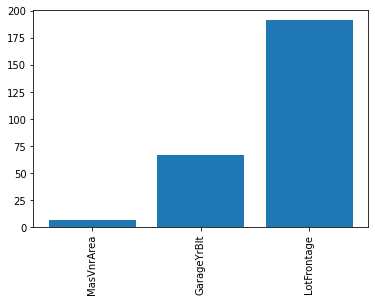

In [4]:
missing = df.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True)

plt.bar(list(missing.index), np.array(missing))
plt.xticks(rotation='vertical')
plt.show()

## 去除缺失值

In [5]:
df = df.dropna()
print(df.shape)

(838, 37)


## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [6]:
target = 'SalePrice'
X = np.asarray(df.drop(columns = [target]))
Y = np.asarray(df[target])

# 將 Y 依照四分位距分成四類
Y = pd.qcut(Y, 4, labels = False)

# 將 X 標準化
X = (X - X.mean(axis = 0)) / X.std(axis = 0)

print(X.shape, Y.shape)

(838, 36) (838,)


## 利用 TSNE 降維

In [7]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
X_tsne = tsne.fit_transform(X)

## 做圖

In [8]:
df_tsne = pd.DataFrame()
df_tsne['X_tsne1'] = X_tsne[:, 0]
df_tsne['X_tsne2'] = X_tsne[:, 1]
df_tsne['label'] = Y
df_tsne.head()

,X_tsne1,X_tsne2,label
0,1.207471,21.083729,2
1,6.399126,23.803251,2
2,17.876123,4.208804,2
3,-22.219351,8.817885,0
4,-5.370535,-7.601844,0


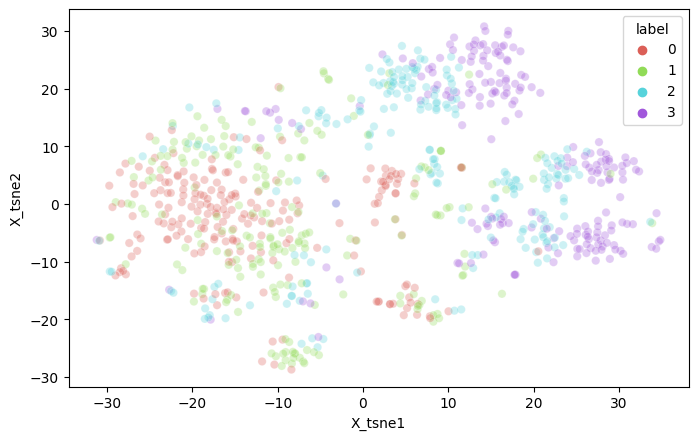

In [9]:
plt.figure(figsize = (8, 5), dpi = 100)
sns.scatterplot(
    x = 'X_tsne1', y = 'X_tsne2',
    hue = 'label', palette = sns.color_palette('hls', 4),
    data = df_tsne, legend = 'full',
    alpha = 0.3
)
plt.show()

## 1. 請問同學從降維後的圖表中可以看出什麼現象？

有類別重疊的現象, 之後可以將比較不同的類別切分開來

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？

目前只使用連續型的特徵，尚未使用離散特徵，且只是單純的將具缺失值的資料刪除，故可以預期降維效果不佳